In [ ]:
%cd 
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c mengary-revenue-prediction
!ls

/root


Saving kaggle.json to kaggle.json
  0% 0.00/370k [00:00<?, ?B/s]
100% 370k/370k [00:00<00:00, 54.2MB/s]
  0% 0.00/798k [00:00<?, ?B/s]
100% 798k/798k [00:00<00:00, 94.0MB/s]
  0% 0.00/25.7k [00:00<?, ?B/s]
100% 25.7k/25.7k [00:00<00:00, 25.4MB/s]
sampleSolution.csv  test.csv  train.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [ ]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6700 non-null   int64  
 1   departure city   6700 non-null   object 
 2   discount         6700 non-null   float64
 3   price            6700 non-null   float64
 4   no of items      6700 non-null   int64  
 5   location         6700 non-null   object 
 6   class            6700 non-null   object 
 7   segment          6700 non-null   object 
 8   sub-class        6700 non-null   object 
 9   delivery type    6699 non-null   object 
 10  RID              6700 non-null   int64  
 11  profit           6700 non-null   float64
 12  delivery date    6700 non-null   object 
 13  address code     6700 non-null   int64  
 14  departure state  6700 non-null   object 
 15  placement date   6700 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 837.6+ KB
<

(None, None)

In [ ]:
len(train_df['departure city'].unique()), len(train_df['sub-class'].unique()), len(train_df['RID'].unique()), len(train_df['address code'].unique())

(469, 17, 6700, 562)

In [ ]:
train_df.isna().any()

id                 False
departure city     False
discount           False
price              False
no of items        False
location           False
class              False
segment            False
sub-class          False
delivery type       True
RID                False
profit             False
delivery date      False
address code       False
departure state    False
placement date     False
dtype: bool

In [ ]:
train_df = train_df.fillna('Standard Class') #Replacing NaN with most frequent label

In [ ]:
train_df.isna().any()

id                 False
departure city     False
discount           False
price              False
no of items        False
location           False
class              False
segment            False
sub-class          False
delivery type      False
RID                False
profit             False
delivery date      False
address code       False
departure state    False
placement date     False
dtype: bool

In [ ]:
train_df = train_df.drop(['id', 'RID', 'delivery date', 'placement date'], axis=1)
test_df = test_df.drop(['id', 'RID', 'delivery date', 'placement date'], axis=1)
train_df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,profit,address code,departure state
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,5.5512,77095,Texas
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,13.3650,48185,Michigan
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,4.8609,48185,Michigan
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,12.7368,48185,Michigan
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,15.9792,48185,Michigan


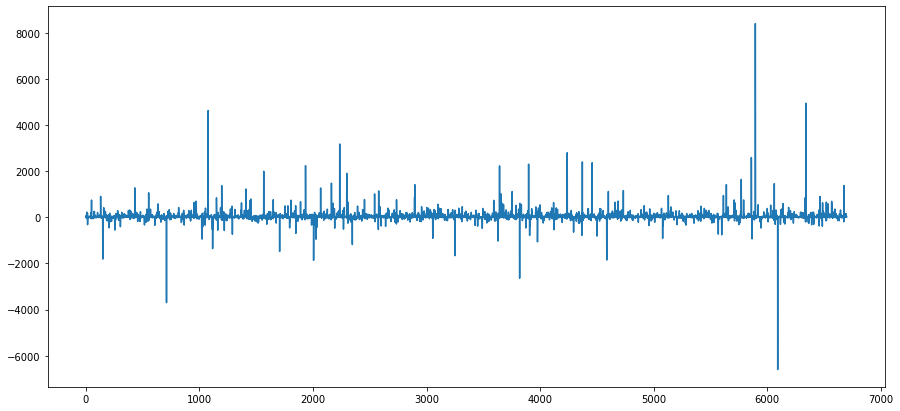

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(train_df.profit)

In [ ]:
from sklearn import preprocessing

def transform_labels(labels:list, df):
  for label in labels:
    le = preprocessing.LabelEncoder()
    df[label] = le.fit_transform(df[label])

In [ ]:
transform_labels(['departure city', 'location', 'class', 'segment', 'sub-class', 'delivery type', 'departure state'], train_df)

In [ ]:
train_df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,profit,address code,departure state
0,186,0.2,16.448,2,0,1,0,10,3,5.5512,77095,40
1,456,0.0,29.700,5,0,1,0,5,3,13.3650,48185,20
2,456,0.0,14.730,3,0,2,0,11,3,4.8609,48185,20
3,456,0.0,43.920,3,0,1,0,14,3,12.7368,48185,20
4,456,0.0,66.580,2,0,1,0,7,3,15.9792,48185,20


In [ ]:
transform_labels(['departure city', 'location', 'class', 'segment', 'sub-class', 'delivery type', 'departure state'], test_df)

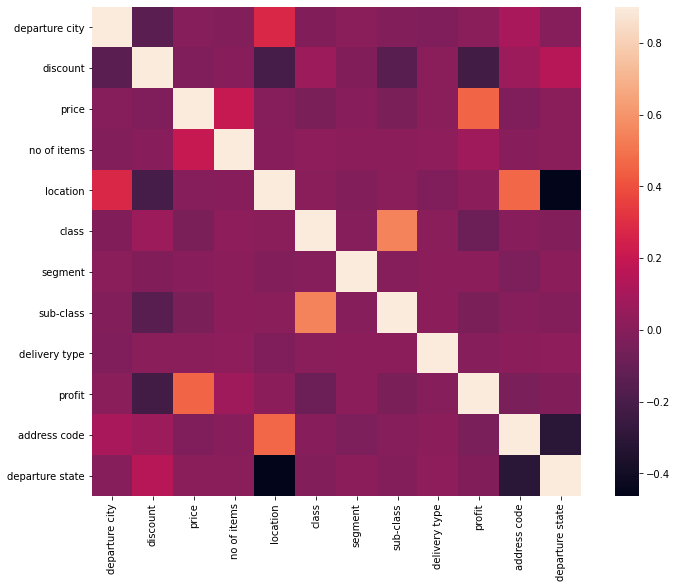

In [ ]:
corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

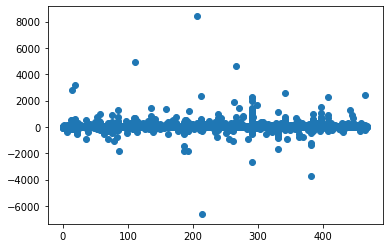

In [ ]:
plt.scatter(train_df['departure city'], train_df.profit)

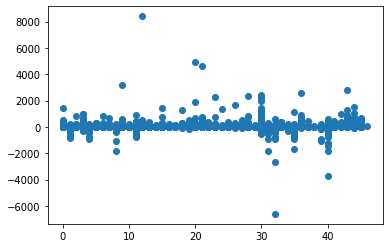

In [ ]:
plt.scatter(train_df['departure state'], train_df.profit)

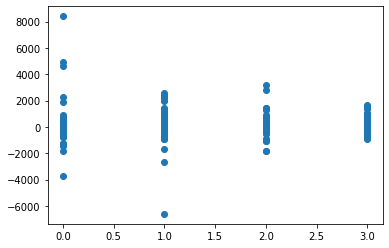

In [ ]:
plt.scatter(train_df['location'], train_df.profit)

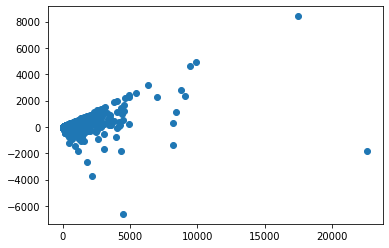

In [ ]:
plt.scatter(train_df['price'], train_df.profit)

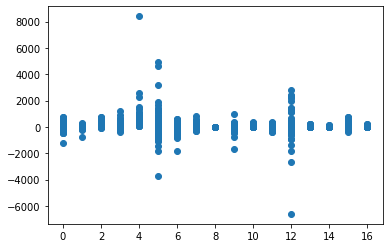

In [ ]:
plt.scatter(train_df['sub-class'], train_df.profit)

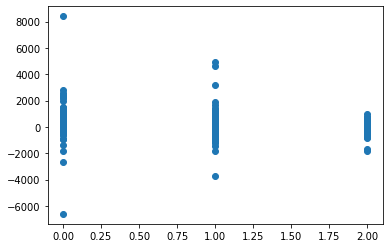

In [ ]:
plt.scatter(train_df['class'], train_df.profit)

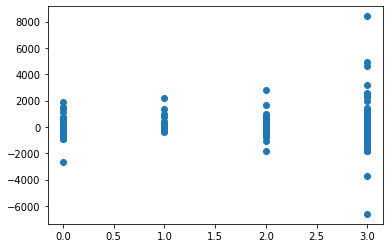

In [ ]:
plt.scatter(train_df['delivery type'], train_df.profit)

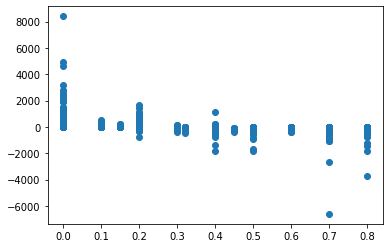

In [ ]:
plt.scatter(train_df['discount'], train_df.profit)

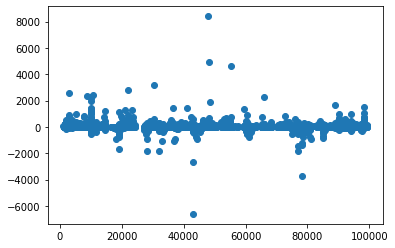

In [ ]:
plt.scatter(train_df['address code'], train_df.profit)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


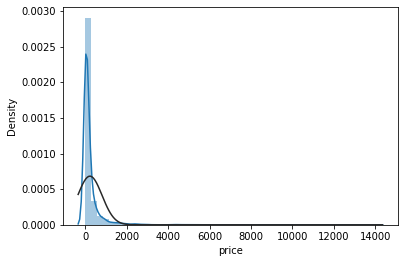

In [ ]:
from scipy.stats import norm, skew
sns.distplot(test_df['price'] , fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


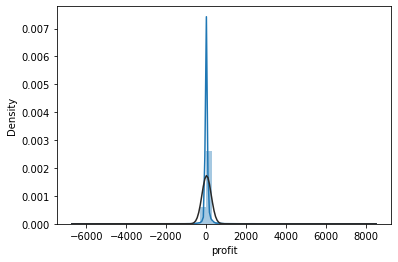

In [ ]:
sns.distplot(train_df['profit'] , fit=norm)

In [ ]:
train_df['price'] = np.log1p(train_df['price'])

In [ ]:
test_df['price'] = np.log1p(test_df['price'])

In [ ]:
test_df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,address code,departure state
0,291,0.0,3.226844,5,3,1,0,14,3,94122,3
1,291,0.2,5.888811,3,3,0,0,3,3,94122,3
2,335,0.0,1.508512,2,1,1,0,14,3,6708,5
3,45,0.2,2.527327,5,0,1,0,13,0,60653,11
4,300,0.0,5.496922,3,3,1,2,7,3,98115,44


In [ ]:
train_df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,profit,address code,departure state
0,186,0.2,2.859225,2,0,1,0,10,3,5.5512,77095,40
1,456,0.0,3.424263,5,0,1,0,5,3,13.3650,48185,20
2,456,0.0,2.755570,3,0,2,0,11,3,4.8609,48185,20
3,456,0.0,3.804883,3,0,1,0,14,3,12.7368,48185,20
4,456,0.0,4.213312,2,0,1,0,7,3,15.9792,48185,20


In [ ]:
train = train_df[:int(0.8*len(train_df))]
valid = train_df[int(0.8*len(train_df)):]
X_train = train[['discount', 'price', 'sub-class', 'location', 'departure state']]
y_train = train['profit']
X_valid = valid[['discount', 'price', 'sub-class', 'location', 'departure state']]
y_valid = valid['profit']

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor

In [ ]:
!pip install catboost

In [ ]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor

In [ ]:
stack_gen = StackingRegressor(regressors=(GradientBoostingRegressor(n_estimators=500, max_depth=4),
                                          XGBRegressor(n_estimators=500), RandomForestRegressor(n_estimators=500,max_depth=4)),
                              meta_regressor = GradientBoostingRegressor(n_estimators=500, max_depth=4),
                              use_features_in_secondary = True)
stack_gen.fit(X_train, y_train)

[10:01:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(meta_regressor=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=4,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [ ]:
stack_gen.score(X_train, y_train), stack_gen.score(X_valid, y_valid)

(0.9988086359208205, 0.7815784551682343)

In [ ]:
stack_gen.fit(train_df[['discount', 'price', 'sub-class', 'location', 'departure state']], train_df['profit'])

[10:01:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(meta_regressor=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=4,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [ ]:
test_df = test_df[['discount', 'price', 'sub-class', 'location', 'departure state']]

In [ ]:
result = stack_gen.predict(test_df)

In [ ]:
result

array([ 6.46850104, 33.05715973,  1.70881794, ..., 32.59037519,
        2.92631236,  0.91568047])

In [ ]:
sample = pd.read_csv('sampleSolution.csv', index_col=False)
sample

,id,profit
0,6701,0
1,6702,0
2,6703,0
3,6704,0
4,6705,0
...,...,...
3289,9990,0
3290,9991,0
3291,9992,0
3292,9993,0


In [ ]:
sample['profit']=result
sample

,id,profit
0,6701,7.108153
1,6702,34.050545
2,6703,1.200021
3,6704,4.054862
4,6705,10.135517
...,...,...
3289,9990,5.664605
3290,9991,9.680811
3291,9992,21.245427
3292,9993,1.713817


In [ ]:
sample.to_csv('sampleSolution.csv', index=False)